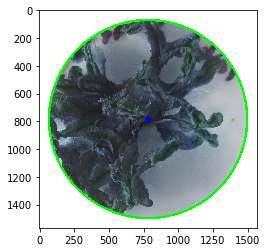

In [40]:
# Import 

import os
from matplotlib import pyplot as plt
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.image as mpimg
import math
import pandas as pd


import param
import paramnb

%matplotlib inline

#img = "20190525_153521.jpg"
image = cv2.imread("./data/processed/test.png") 
#is_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image); #plt.show

In [5]:
class Options(param.Parameterized): 
    
    l1 = param.Number(default = 0, bounds = (0, 255), allow_None = False, step = 1, doc = 'L1')
    
    l2 = param.Number(default = 100, bounds = (0, 255), allow_None = False, step = 1, doc = 'L2')
        
    l3 = param.Number(default = 0, bounds = (0, 255), allow_None = False, step = 1, doc = 'L3')
                      
    u1 = param.Number(default = 144, bounds = (0, 255), allow_None = False, step = 1, doc = 'U1')
    
    u2 = param.Number(default = 238, bounds = (0, 255), allow_None = False, step = 1, doc = 'U2')
        
    u3 = param.Number(default = 144, bounds = (0, 255), allow_None = False, step = 1, doc = 'U3')
    
print("Select your options and click the button to run the widget.\nChange l2 to 50 for better results.")
paramnb.Widgets(Options, next_n = 2, continuous_update = True, button = True)

Select your options and click the button to run the widget.
Change l2 to 50 for better results.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

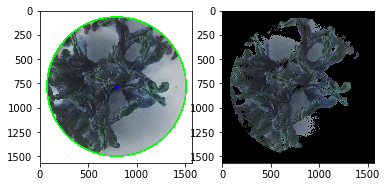

In [23]:
# Plant Size 

#option 1: directly count the number of non-zero pixels in the thresholded image
#option 2: calculate 'min enclosing circle' on the threshold but would be a worse size appromiximation
#option 3: same as option 2 but with a bounding box instead

#threshold plant between light and dark green
#try using the green excess index calculated combining the RGB channels: G_ex = 2 G - R - B.
#That way you get a one-channel image, easy to segment by thresholding. 

#dark_green & light green: np.array([0,100,0]) np.array([144,238,144])
#values that worked: np.array([23,28,26]) np.array([144,238,144])

dark_green = np.array([int(np.floor(x)) for x in [Options.l1, Options.l2, Options.l3]])
light_green = np.array([int(np.floor(x)) for x in [Options.u1, Options.u2, Options.u3]])

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) #cv2.COLOR_BGR2HSV
mask = cv2.inRange(hsv, dark_green, light_green)
res = cv2.bitwise_and(image, image, mask = mask)

_, axarr = plt.subplots(1,2)
axarr[0].imshow(image);
axarr[1].imshow(res);

In [43]:
dish_size_pixels = math.pi*(image.shape[0]/2)**2
plant_size_per_pixels = np.sum(res.ravel() > 0)/dish_size_pixels
plant_size_actual_mm = plant_size_per_pixels*(math.pi*45**2)

In [107]:
# Plant Health

colors = anls.color_hist(image)
plant_green_area = anls.get_area_green(colors)
#max_green = max(colors)

print(area)

901341.0
2007337.0
